In [ ]:
import seaborn as sns
import polars as pl
import polars.selectors as cs
import matplotlib.pyplot as plt

In [4]:
(bodyfat :=
 pl.read_csv(".data/bodyfat.csv")
 ).head()

shape: (5, 15)
┌─────────┬─────────┬─────┬────────┬───┬───────┬────────┬─────────┬───────┐
│ density ┆ bodyfat ┆ age ┆ weight ┆ … ┆ ankle ┆ biceps ┆ forearm ┆ wrist │
│ ---     ┆ ---     ┆ --- ┆ ---    ┆   ┆ ---   ┆ ---    ┆ ---     ┆ ---   │
│ f64     ┆ f64     ┆ i64 ┆ f64    ┆   ┆ f64   ┆ f64    ┆ f64     ┆ f64   │
╞═════════╪═════════╪═════╪════════╪═══╪═══════╪════════╪═════════╪═══════╡
│ 1.0708  ┆ 12.3    ┆ 23  ┆ 154.25 ┆ … ┆ 21.9  ┆ 32.0   ┆ 27.4    ┆ 17.1  │
│ 1.0853  ┆ 6.1     ┆ 22  ┆ 173.25 ┆ … ┆ 23.4  ┆ 30.5   ┆ 28.9    ┆ 18.2  │
│ 1.0414  ┆ 25.3    ┆ 22  ┆ 154.0  ┆ … ┆ 24.0  ┆ 28.8   ┆ 25.2    ┆ 16.6  │
│ 1.0751  ┆ 10.4    ┆ 26  ┆ 184.75 ┆ … ┆ 22.8  ┆ 32.4   ┆ 29.4    ┆ 18.2  │
│ 1.034   ┆ 28.7    ┆ 24  ┆ 184.25 ┆ … ┆ 24.0  ┆ 32.2   ┆ 27.7    ┆ 17.7  │
└─────────┴─────────┴─────┴────────┴───┴───────┴────────┴─────────┴───────┘

In [5]:
(cat_predictors :=
 bodyfat
 .unpivot(index='bodyfat',
          variable_name='predictor',
          value_name='label')
 .to_pandas()
)

bodyfat predictor    label
0        12.3   density   1.0708
1         6.1   density   1.0853
2        25.3   density   1.0414
3        10.4   density   1.0751
4        28.7   density   1.0340
...       ...       ...      ...
3523     11.0     wrist  18.5000
3524     33.6     wrist  20.1000
3525     29.3     wrist  18.0000
3526     26.0     wrist  19.8000
3527     31.9     wrist  20.9000

[3528 rows x 3 columns]

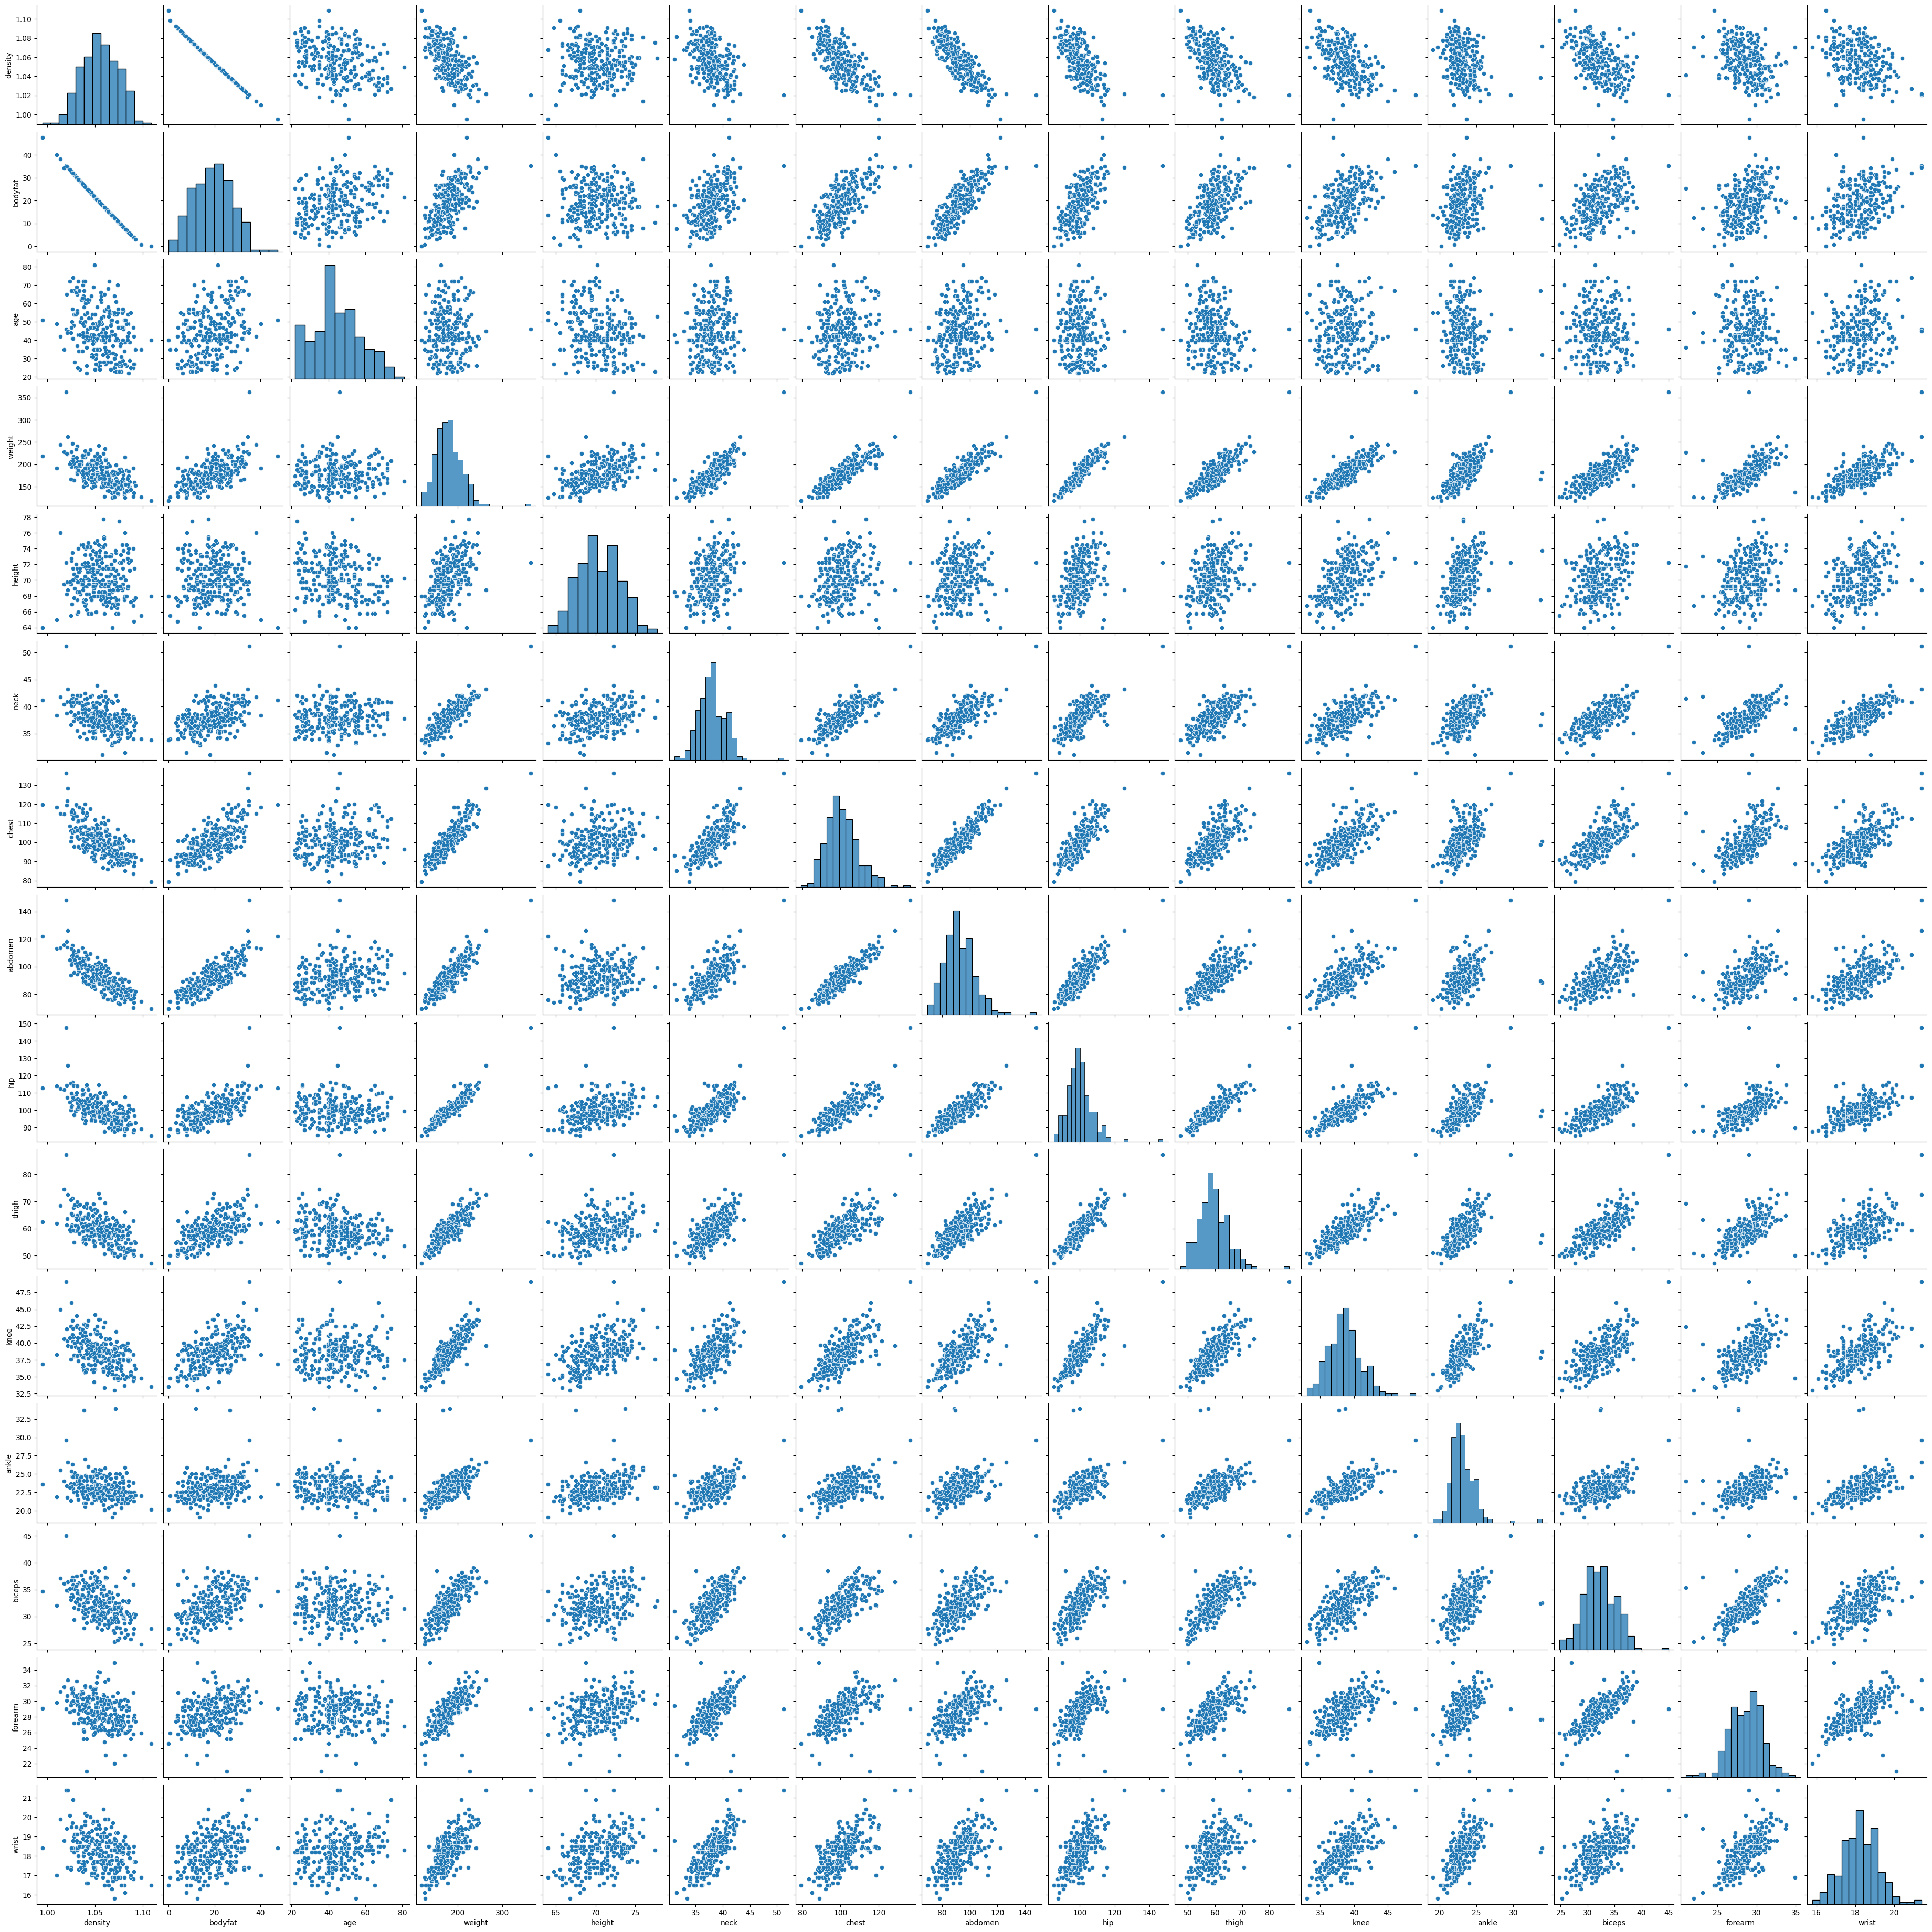

In [7]:
sns.pairplot(bodyfat.to_pandas())

## **With Smoother**

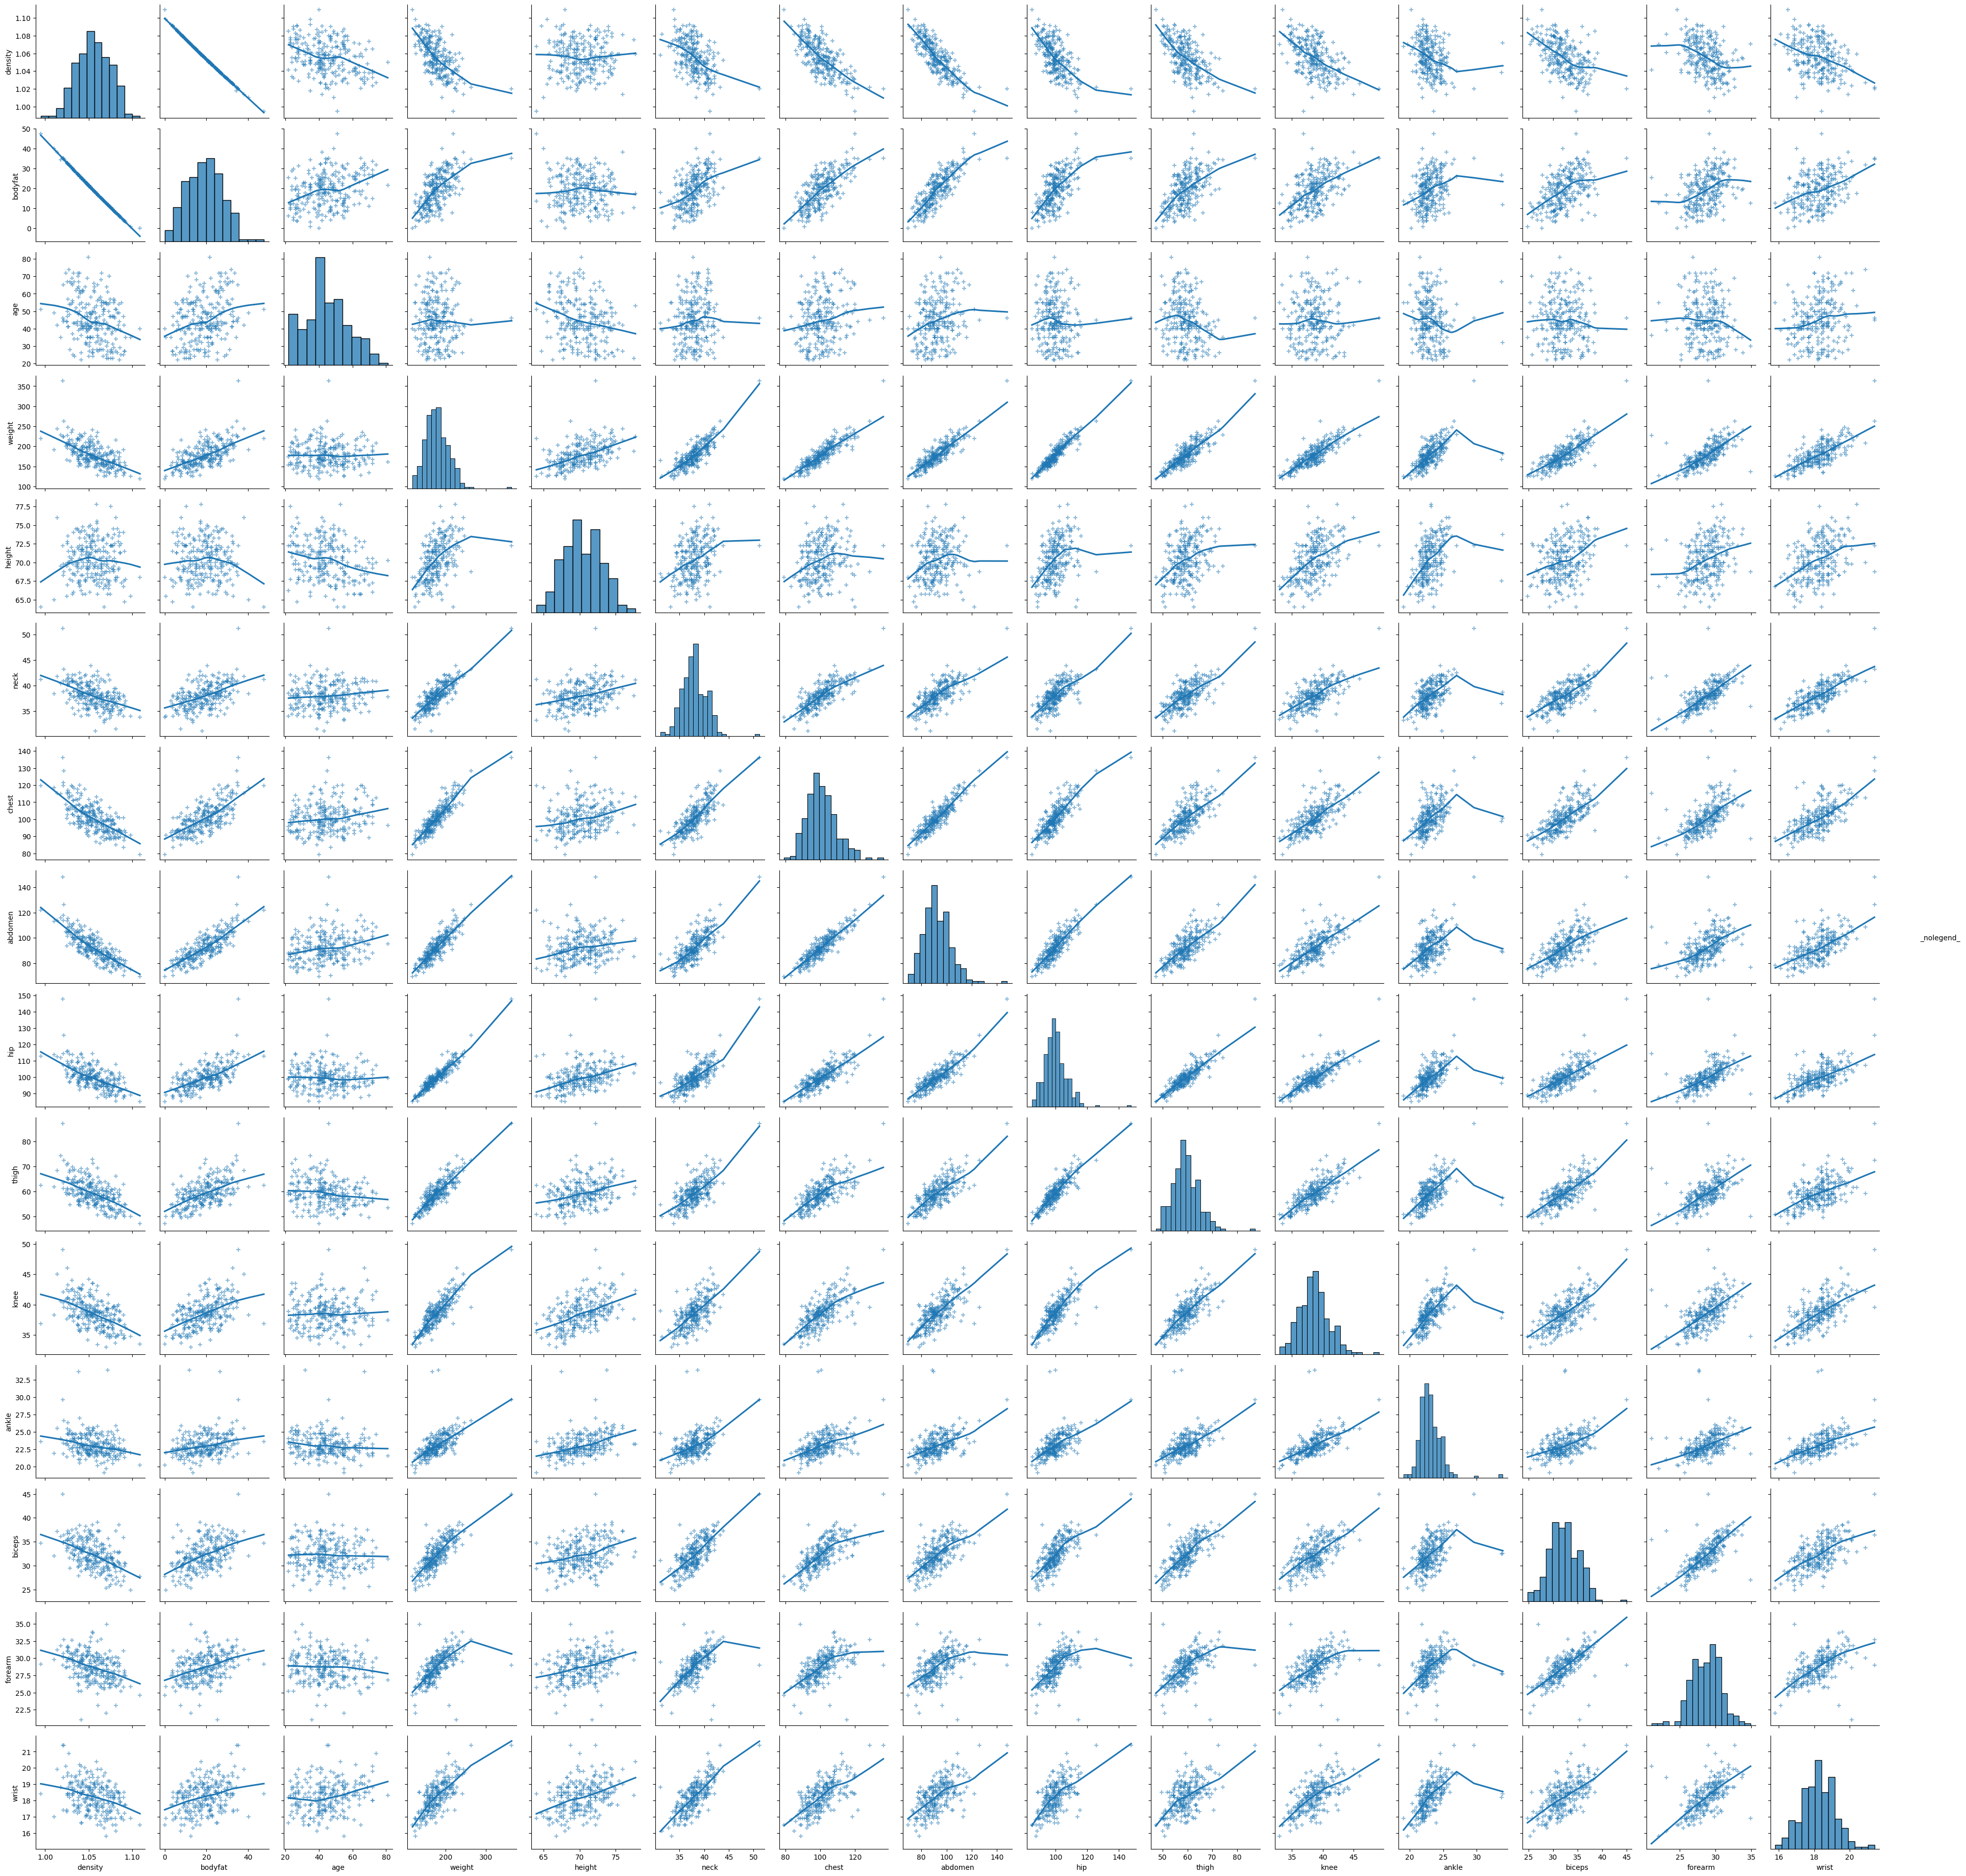

In [8]:
g = sns.PairGrid(bodyfat.to_pandas())
g.map_diag(sns.histplot)
g.map_offdiag(sns.regplot,
              lowess=True,
              marker="+",
              scatter_kws={'alpha': 0.5}
              )
g.add_legend()

## Basic stuff

In [9]:
(
    bodyfat
    .corr()
    .with_columns(predictor=pl.Series(bodyfat.columns))
    .select("predictor", pl.col("bodyfat").alias("correlation"))
    .filter(pl.col("predictor") != "bodyfat")
    .with_columns(abs_corr=pl.col("correlation").abs())
    .sort("abs_corr", descending=True)
    .select("predictor", "correlation")
    .head(5)
)

shape: (5, 2)
┌───────────┬─────────────┐
│ predictor ┆ correlation │
│ ---       ┆ ---         │
│ str       ┆ f64         │
╞═══════════╪═════════════╡
│ density   ┆ -0.999092   │
│ abdomen   ┆ 0.813432    │
│ chest     ┆ 0.70262     │
│ hip       ┆ 0.625201    │
│ weight    ┆ 0.612414    │
└───────────┴─────────────┘

For this body fat percentage is strongly associated with several factors. Density shows an almost perfect negative correlation, indicating that as body density increases, body fat percentage decreases in a near-linear relationship. Measurements related to body circumference, like the abdomen, have a strong positive correlation with body fat, making them key indicators of adiposity. Chest and hip measurements also show positive relationships, while weight has a moderate positive correlation, suggesting that body fat is more closely tied to fat distribution and body composition than weight alone.
